# 图像特效-边缘锐化

In [1]:
from scipy import signal
import numpy as np
import cv2
import matplotlib.pyplot as plt
from numpy.lib.function_base import histogram

In [2]:
src = cv2.imread('../datas/f2.jpg')
gray = cv2.imread('../datas/f2.jpg',0)
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)

In [3]:
def edge_shappern_filter(src):
    srcf = np.float32(src)
    dst = np.zeros_like(srcf)
    kernel_r = np.array([
        [1,1,1],
        [1,-7,1],
        [1,1,1]
    ])
    dstr =  signal.convolve2d(srcf[:,:,0],kernel_r, boundary='symm', mode='same')
    dstg =  signal.convolve2d(srcf[:,:,1],kernel_r, boundary='symm', mode='same')
    dstb =  signal.convolve2d(srcf[:,:,2],kernel_r, boundary='symm', mode='same')
    dst = cv2.merge([dstr,dstg,dstb])
    dst[dst > 255] = 255
    dst[dst < 0] = 0
    return dst.astype(np.uint8)

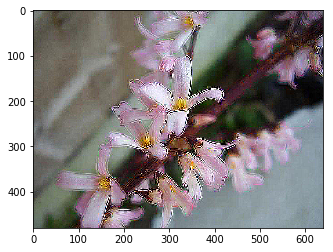

In [4]:
dst = edge_shappern_filter(rgb)
plt.imshow(dst)